In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [32]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime

In [26]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///../Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [28]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Stations = Base.classes.station
Measurements = Base.classes.measurement

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
session.query(func.max(Measurements.date)).scalar()

'2017-08-23'

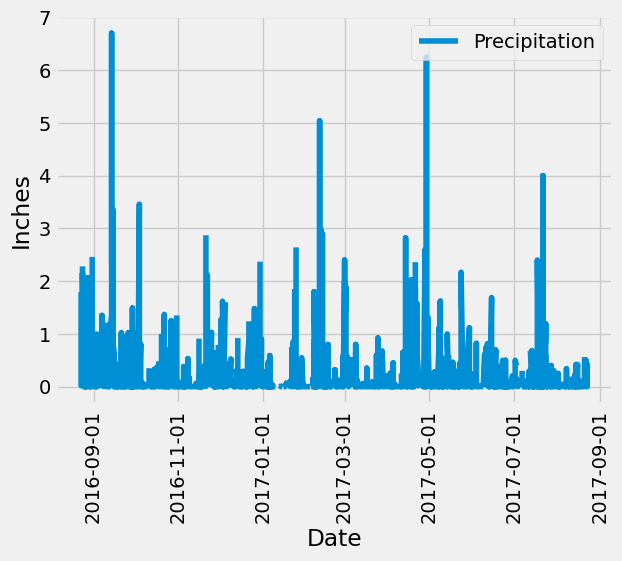

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date_query = session.query(func.max(Measurements.date)).scalar()
recent_date = pd.to_datetime(recent_date_query)

# Calculate the date one year from the last date in data set.
one_year = recent_date - pd.DateOffset(years=1)
one_year_ago = one_year.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(df['Date'], df['Precipitation'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.legend(['Precipitation'],loc='upper right')
plt.show()

In [53]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['Precipitation'].describe()
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [56]:
# Design a query to calculate the total number of stations in the dataset
total_num_stations = session.query(Stations).count()
total_num_stations

9

In [58]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurements.station, func.count(Measurements.station)).\
                    group_by(Measurements.station).\
                    order_by(func.count(Measurements.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Answer the following question: which station id has the greatest number of observations?
# Station 'USC00519281' had the most number of observations at 2772.

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Retrieve the most active station id from the previous query
most_active_station_id = station_activity[0][0] 

# Perform queries to calculate the lowest, highest, and average temperature for the most active station
lowest_temp = session.query(func.min(Measurements.tobs)).filter(Measurements.station == most_active_station_id).scalar()
highest_temp = session.query(func.max(Measurements.tobs)).filter(Measurements.station == most_active_station_id).scalar()
avg_temp = session.query(func.avg(Measurements.tobs)).filter(Measurements.station == most_active_station_id).scalar()

print(lowest_temp, highest_temp, avg_temp) 


54.0 85.0 71.66378066378067


Text(0, 0.5, 'Frequency')

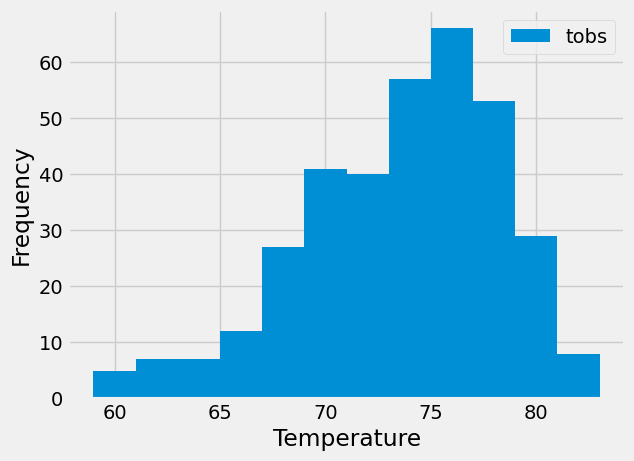

In [63]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurements.tobs).\
    filter(Measurements.station == most_active_station_id).\
    filter(Measurements.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame
df_results = pd.DataFrame(results, columns=['tobs'])

# Plot the histogram
df_results.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Close Session

In [64]:
# Close Session
session.close()